In [8]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:

stack_band_paths = ["D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B204_L1T.TIF",
             "D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B150_L1T.TIF",
             "D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B093_L1T.TIF"]

In [10]:
raster1 = rasterio.open(stack_band_paths[0])
raster2 = rasterio.open(stack_band_paths[1])
raster3 = rasterio.open(stack_band_paths[2])

In [11]:
red = raster1.read(1)
green = raster2.read(1)
blue = raster3.read(1)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.02513732650932428
0.0 - 1.0 mean: 0.06597761925513031
0.0 - 1.0 mean: 0.11505441606888545


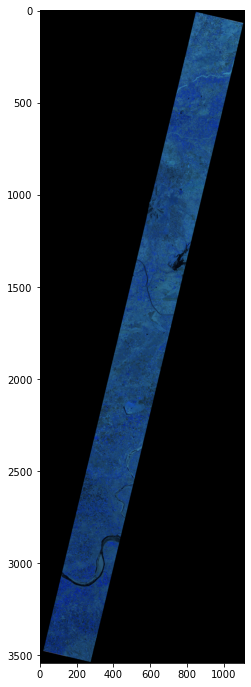

In [12]:

rgb_initial = np.dstack((redn, greenn, bluen))
fig, ax = plt.subplots(figsize=(12, 12))
# Let's see how our color composite looks like
plt.imshow(rgb_initial)

In [13]:
from PIL import Image

In [14]:
def crop(image):
    y_nonzero, x_nonzero = np.nonzero(image)
    return image[0:3520, 400:650]

In [15]:
def correct_image(image, angle_of_rotation):
    im_pil = Image.fromarray(image)
    rotated     = im_pil.rotate(angle_of_rotation)
    segmented_image = np.asarray(rotated)
    cropped_image = crop(segmented_image)
    rows,cols = cropped_image.shape
    return cropped_image, rows, cols

In [19]:
import tifffile as tiff
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

X_data = []
files = glob.glob ("D:\Machine Learning\Hyperspectral\*.TIF")
for myFile in files:

    image = cv2.imread(myFile,0)
    # Detecting bad bands if the ratio of non black pixels are less than 8% of the enitre image and neglecting them
    rows ,columns = image.shape
    if (cv2.countNonZero(image) < (0.08 * rows * columns )):
        continue
        
    image = tiff.imread(myFile)
    im,_,_ = correct_image(image,13)
    X_data.append(im)

In [20]:

# Converting list into an array
X_train_array = np.array(X_data)
print(X_train_array.shape)

(143, 3520, 250)


In [21]:

#Flattening the array

dims, orig_rows, orig_cols = X_train_array.shape
X_flat = X_train_array.reshape((dims, orig_rows*orig_cols))
print(X_flat.shape)


(143, 880000)


In [22]:

# Transposing to select principal components of the band dimension

X_flat_transposed = np.transpose(X_flat)
print(X_flat_transposed.shape)

(880000, 143)


In [23]:

X_flat.shape

(143, 880000)

In [24]:
#Using the IncrementalPCA method from the scikit-learn library

from sklearn.decomposition import IncrementalPCA

IPCA = IncrementalPCA(n_components=5, batch_size = 5)
X_IPCA = IPCA.fit_transform(X_flat_transposed)

print(X_IPCA.shape)

C:\Users\Kruti\Anaconda3\lib\site-packages\sklearn\decomposition\_incremental_pca.py:301: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio = S ** 2 / np.sum(col_var * n_total_samples)
C:\Users\Kruti\Anaconda3\lib\site-packages\sklearn\decomposition\_incremental_pca.py:313: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\Kruti\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  rcount = _count_reduce_items(arr, axis)


(880000, 5)


In [25]:
#Array is transposed to be consistent with the original format

X_IPCA = np.transpose(X_IPCA)
X_IPCA.shape

(5, 880000)

In [26]:

PC0=  X_IPCA[0].reshape(orig_rows,orig_cols)
PC1=  X_IPCA[1].reshape(orig_rows,orig_cols)
PC2=  X_IPCA[2].reshape(orig_rows,orig_cols)

In [27]:
PC_List = [PC0,PC1,PC2]

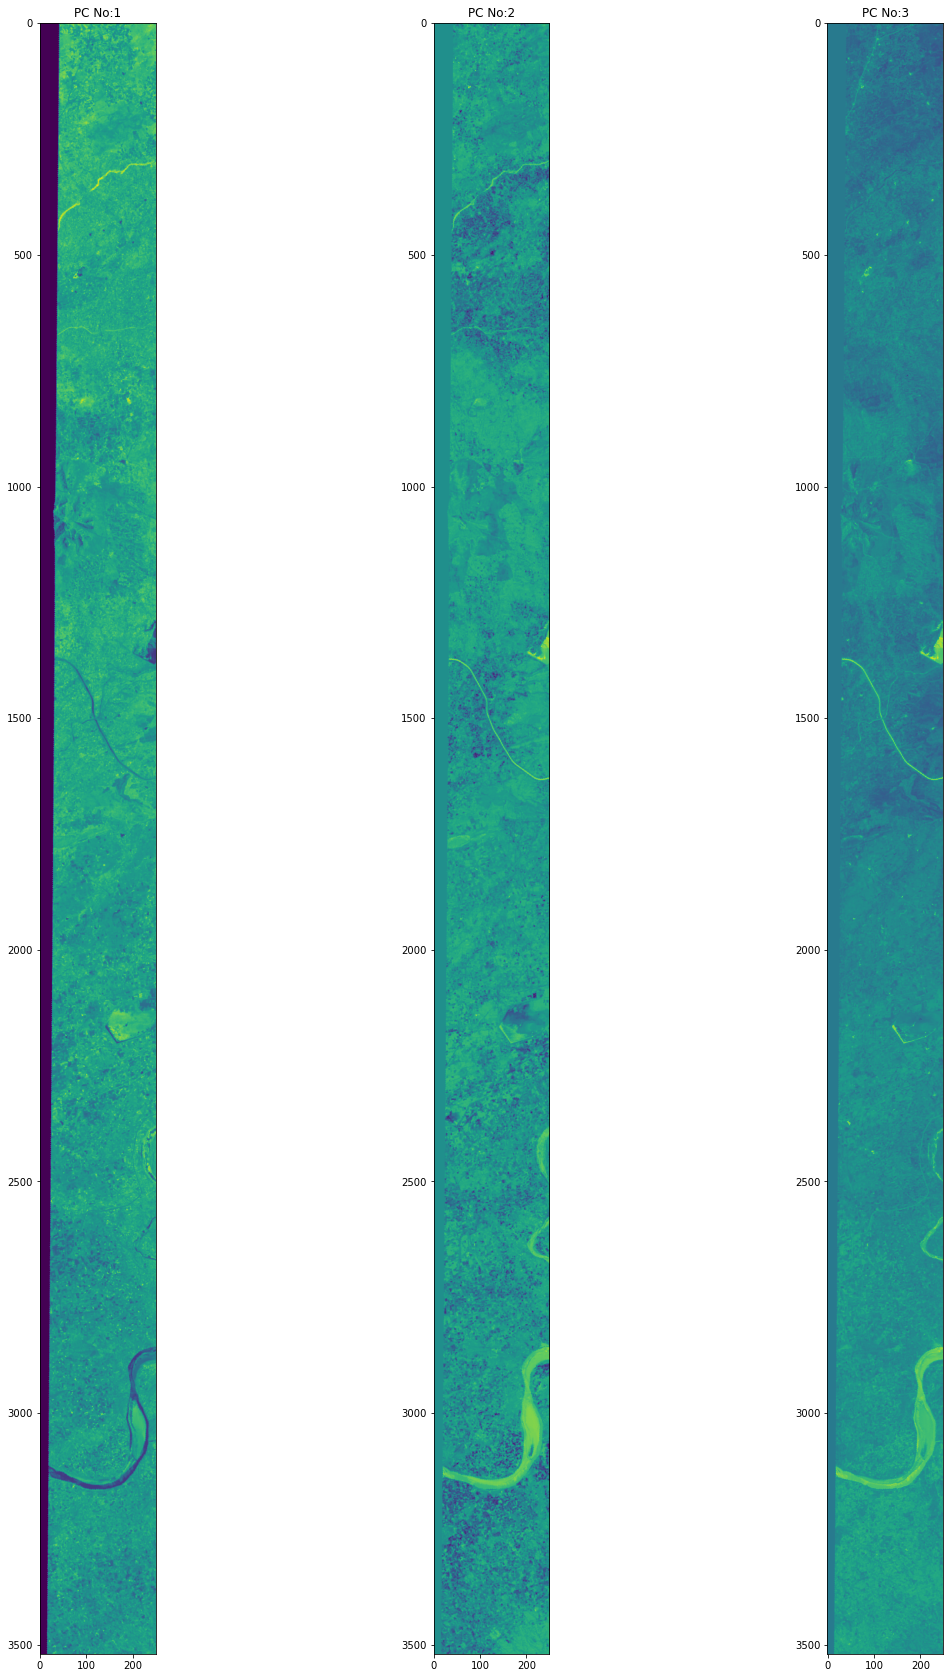

In [28]:

fig = plt.figure(figsize=(20, 30))
for PC_No in range(0,3):
  
    a = fig.add_subplot(1,3,PC_No+1)  
    i = PC_No+1
    a.set_title("PC No:{}".format(i))
    plt.imshow(PC_List[PC_No])
    
    
    
plt.show()

In [29]:
red = PC0
green = PC1
blue = PC2

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.5054432275357992
0.0 - 1.0 mean: 0.523622295052656
0.0 - 1.0 mean: 0.4637461777366111


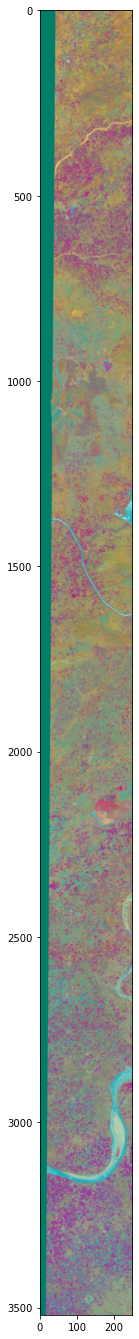

In [30]:
rgb_PC = np.dstack((redn, greenn, bluen))
fig, ax = plt.subplots(figsize=(24, 24))
# Let's see how our color composite looks like
plt.imshow(rgb_PC)

In [31]:

from PIL import Image

In [52]:
def crop(image):
    y_nonzero, x_nonzero = np.nonzero(image)
    return image[0:rows, 400:650]

In [53]:
def correct_image(image, angle_of_rotation):
    im_pil = Image.fromarray(image)
    rotated     = im_pil.rotate(angle_of_rotation)
    segmented_image = np.asarray(rotated)
    cropped_image = crop(segmented_image)
    rows,cols = cropped_image.shape
    return cropped_image, rows, cols

In [61]:
new_rows, new_cols, _ = rgb_PC.shape
vectorized =rgb_PC.reshape((new_rows*new_cols), 3)
print(vectorized.shape)

(880000, 3)


In [62]:
from sklearn.cluster import KMeans

score = []

for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(vectorized)
    score.append(kmeans.inertia_)

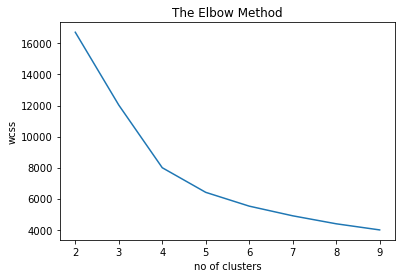

In [63]:
# Plotting the score

plt.plot(range(2,10), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

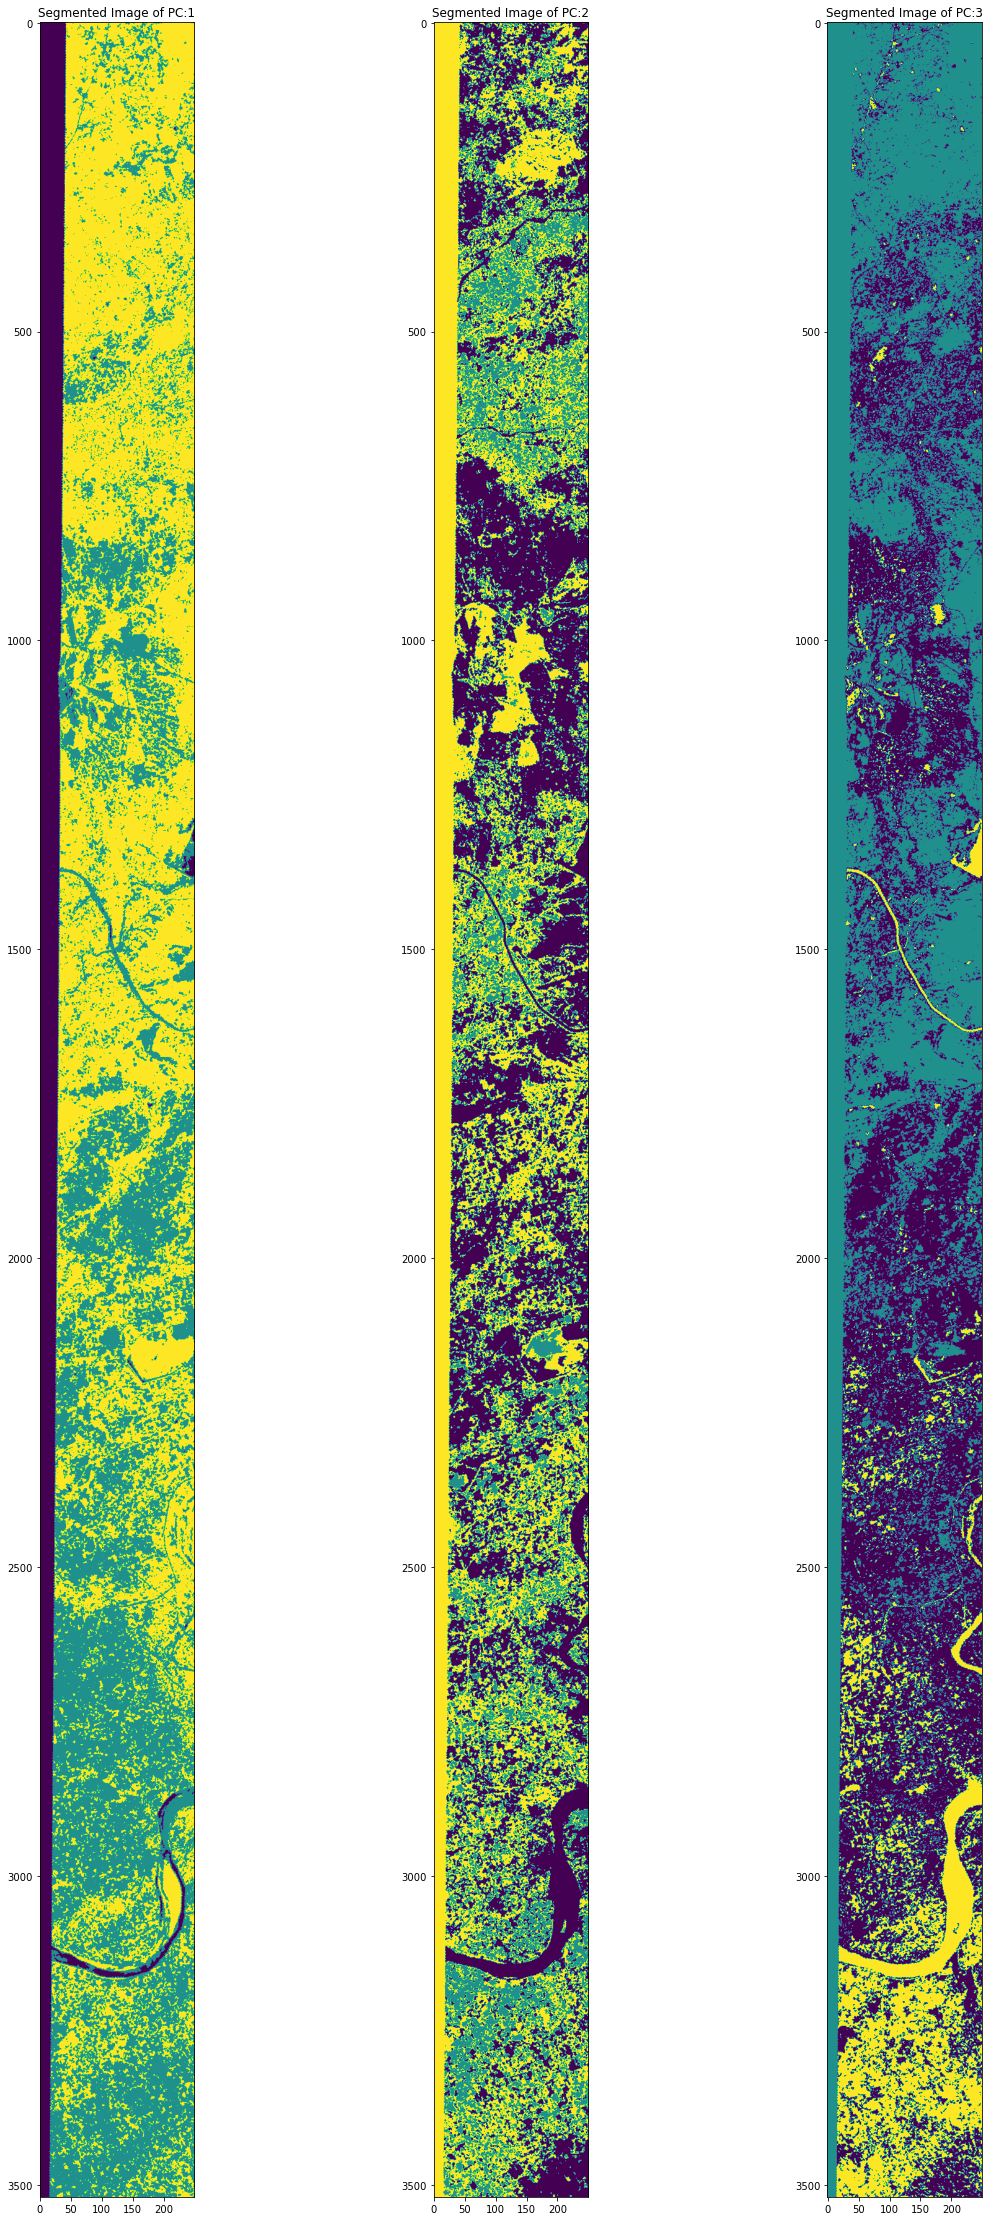

In [64]:
#Run KMeans to Segment the first four principle components

fig = plt.figure(figsize=(20, 40))
segmented_images = []
kmeans = KMeans(random_state=0, init='random', n_clusters=3)
for PC_No in range(0,3):
    
    vectorized = PC_List[PC_No].reshape((new_rows*new_cols), 1)
    labels = kmeans.fit_predict(vectorized)
    
    segmented_image = labels.reshape(new_rows,new_cols)
    segmented_images.append(segmented_image)
    a = fig.add_subplot(1,3,PC_No+1)  
    i = PC_No+1
    a.set_title("Segmented Image of PC:{}".format(i))
    plt.imshow(segmented_image)
    
    
    
plt.show()

In [65]:

#We use the davies_bouldin_score as a clustering performance metric

from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(vectorized, labels)
print(score)

0.5635994553150478


In [66]:
stack_band_paths = ["D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B204_L1T.TIF",
             "D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B150_L1T.TIF",
             "D:\Machine Learning\Hyperspectral\EO1H1480442013120110KZ_B093_L1T.TIF"]

In [67]:
raster1_1 = rasterio.open(stack_band_paths[0])
raster2_1 = rasterio.open(stack_band_paths[1])
raster3_1= rasterio.open(stack_band_paths[2])

In [68]:
raster1_2,r,c = correct_image(raster1_1.read(1),13)
raster2_2,r,c = correct_image(raster2_1.read(1),13)
raster3_2,r,c = correct_image(raster3_1.read(1),13)

In [69]:
np.array(raster2_2).shape

(3541, 250)

In [70]:
red = raster1_2
green = raster2_2
blue = raster3_2

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redni = normalize(red)
greenni = normalize(green)
blueni = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.5054432275357992
0.0 - 1.0 mean: 0.523622295052656
0.0 - 1.0 mean: 0.4637461777366111


In [71]:
red = segmented_images[0]
green = segmented_images[1]
blue = segmented_images[2]

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
rednf = normalize(red)
greennf = normalize(green)
bluenf = normalize(blue)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalized bands
0.0 - 1.0 mean: 0.5054432275357992
0.0 - 1.0 mean: 0.523622295052656
0.0 - 1.0 mean: 0.4637461777366111


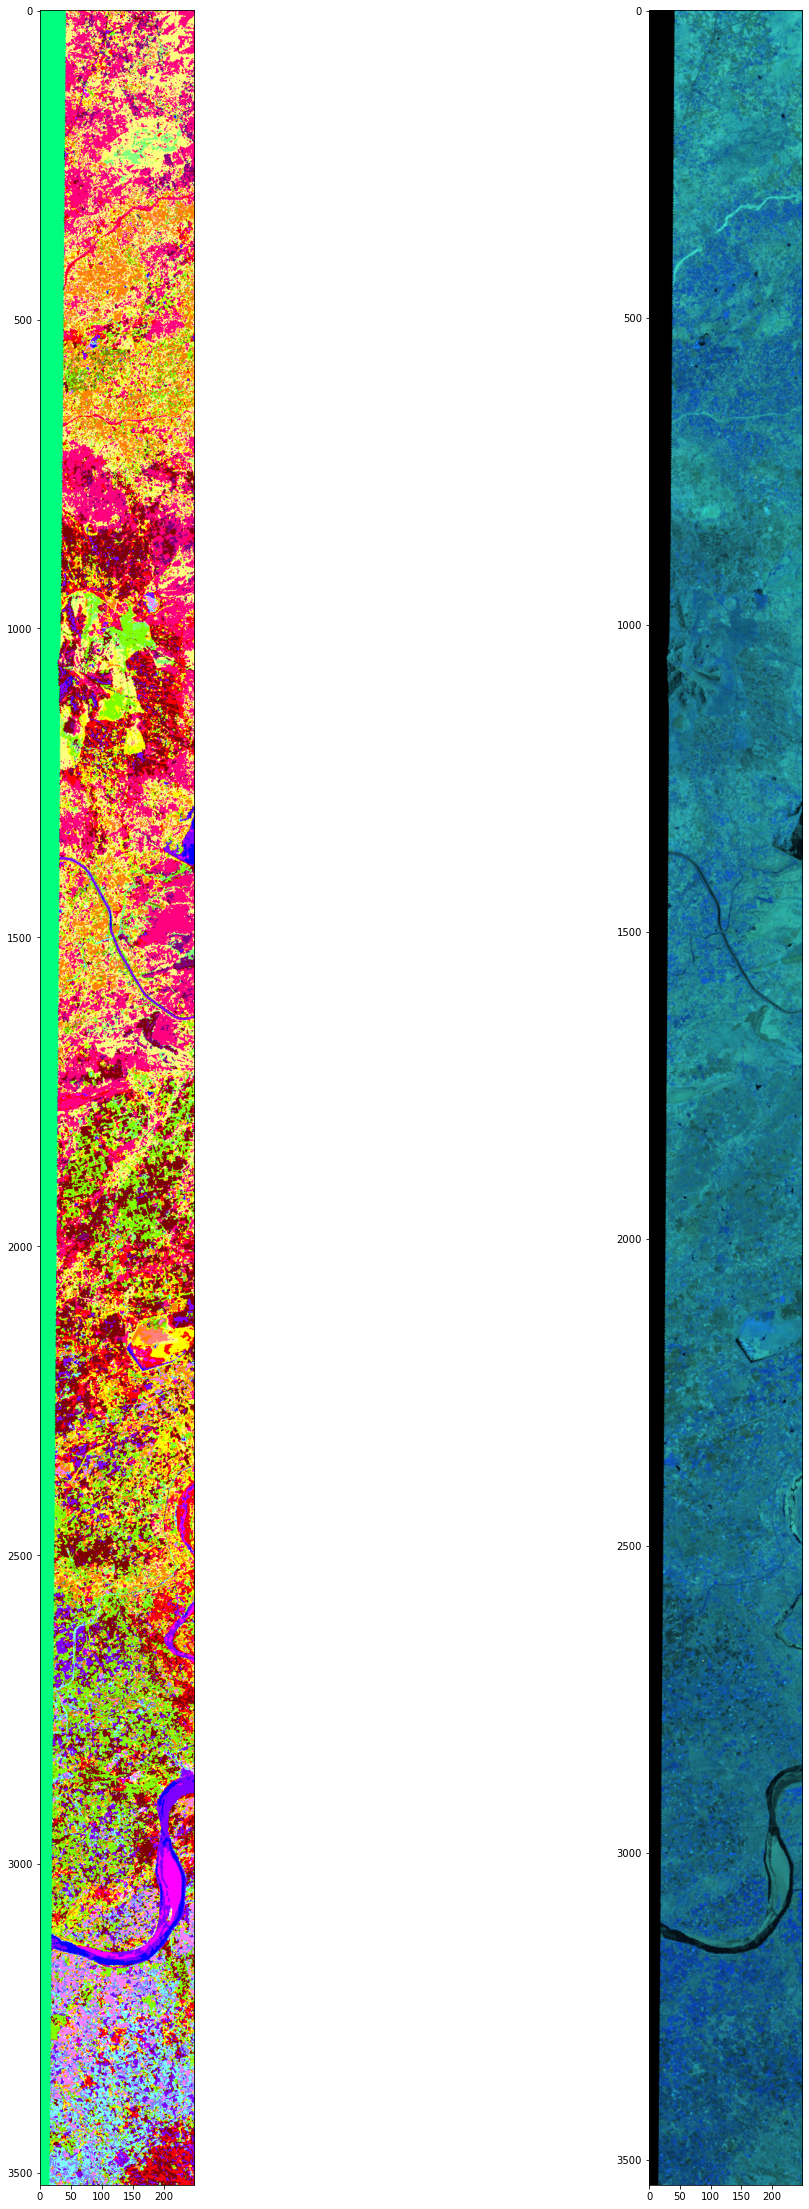

In [72]:

rgb_initial = np.dstack((redni, greenni, blueni))
rgb_final = np.dstack((rednf, greennf, bluenf))

fig = plt.figure(figsize=(20, 40))
# Let's see how our color composite looks like
a = fig.add_subplot(1,2,1)
plt.imshow(rgb_final)

a = fig.add_subplot(1,2,2)
plt.imshow(rgb_initial)

plt.show()